In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных:

In [2]:
train = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\6 Диплом\\house prices regression\\train.csv')
test = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\6 Диплом\\house prices regression\\test.csv')
submission = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\6 Диплом\\house prices regression\\sample_submission.csv')

Посмотрим размер тренировочной таблицы:

In [3]:
train.shape

(1460, 81)

Уберем дубликаты:

In [4]:
train = train.drop_duplicates()

Дубликатов не было:

In [5]:
train.shape

(1460, 81)

### Представление тренировочных данных в виде таблицы:

Так как таблица имеет много столбцов, то рассмотрим частями

In [6]:
train.iloc[:,:20].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000


In [7]:
train.iloc[:,20:40].head()

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA
1,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA
2,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA
3,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA
4,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA


In [8]:
train.iloc[:,40:60].head()

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0


In [9]:
train.iloc[:,60:70].head()

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
0,RFn,2,548,TA,TA,Y,0,61,0,0
1,RFn,2,460,TA,TA,Y,298,0,0,0
2,RFn,2,608,TA,TA,Y,0,42,0,0
3,Unf,3,642,TA,TA,Y,0,35,272,0
4,RFn,3,836,TA,TA,Y,192,84,0,0


In [10]:
train.iloc[:,70:81].head()

,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Описание датасета

Первый столбец - ID, последний - target value, а остальные столбцы описывают характеристики домов.

MSSubClass: Identifies the type of dwelling involved in the sale. (Определяет тип жилого помещения, участвующего в продаже)	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.(Определяет общую классификацию зонирования объекта продажи)
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential (жилая плавучая деревня?)
       I	Industrial
       RH	Residential High Density (жилая высокая плотность)
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property (длина улицы, соединенной с недвижимостью)

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel (Гравий)
       Pave	Paved (Мощеная)
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac (тупик)
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property (наклон)
		
       Gtl	Gentle slope (пологий)
       Mod	Moderate Slope	
       Sev	Severe Slope (крутой)
	
Neighborhood: Physical locations within Ames city limits (локации города)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions (близость к различными дорогам / путям)
	
       Artery	Adjacent to arterial street (прилегает к магистрали)
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling (тип жилища)
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer (раздельное фойе)
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house (оценка материалов и отделки)

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn) 
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile (глина или плтика)
       CompShg	Standard (Composite) Shingle (стандартная (композитная) черепица)
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar (гравий и смола)
       WdShake	Wood Shakes
       WdShngl	Wood Shingles (деревянная черепица)
		
Exterior1st: Exterior covering on house (наружное покрытие дома)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type (тип облицовочной кладки)

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior (качетсво материалов облицовки)
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces (количество каминов)

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway (асфальтированный подъезд)

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet (площадь открытой веранды)

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality (качественный забор)
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories (разные доп. фишки)
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

### Описание таблицы:

38 столбцов с числовыми значениями и 43 с текстовыми, часть значений отсутствует

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Описательная статистика

Следует обратить внимание на переменные MSSubClass, LotArea, MasVnrArea, BsmtFinSF2, BsmtUnfSF, 2ndFlrSF, LowQualFinSF,
BsmtFullBath, BsmtHalfBath, FullBath - у них очень большое стандартное отлонение по отношению к средней величине

In [12]:
round(train.iloc[:,:50].describe(),1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6
std,421.6,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0
25%,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0
50%,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0
75%,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0


А также на переменные HalfBath, Fireplaces, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

In [13]:
round(train.iloc[:,50:].describe(),1)

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.4,2.9,1.0,6.5,0.6,1978.5,1.8,473.0,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,0.5,0.8,0.2,1.6,0.6,24.7,0.7,213.8,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


### Заполнение пропущенных значений

Скопируем датасет, чтобы проводить манипуляции в нем, а не в исходном

In [14]:
train_w = train.copy()

Параметры MasVnrType и MasVnrArea (каменная кладка).

Отсутствие некоторых параметров может указывать на отсутствие такого признака у объекта.
MasVnrType и MasVnrArea - отсутствующие значения каждого столбца находятся в одинаковых строках:

In [15]:
train_w[train_w['MasVnrType'].isnull()].iloc[:, 25:27]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


MasVnrType заполним None, а MasVnrArea значением 0:

In [16]:
train_w['MasVnrType'] = train_w['MasVnrType'].fillna('None')
train_w['MasVnrArea'] = train_w['MasVnrArea'].fillna(0)

Параметр Alley.

Очень много пропущенных значений, причем значения "No alley access" нет ни у одного объекта. Предположим, что пропущенные значения - это и есть признак отсутсвия.  

In [17]:
train_w['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Заполним пропущенные значения признаком "No alley access": 

In [18]:
train_w['Alley'] = train_w['Alley'].fillna('NA')

Параметры GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

Посчитаем количество объектов, у которых площадь гаража равна 0, их число совпадает с количеством отсутствующих значениний
в других полях, описывающих гараж:

In [19]:
train_w[train_w['GarageArea'] == 0]['GarageArea'].count()

81

У пропущенных параметров GarageType, GarageYrBlt, GarageFinish, GarageQual и GarageCond значения GarageCars и GarageArea
равны 0:

In [20]:
train_w[train_w['GarageType'].isnull()].iloc[:, 58:65].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN


Заполним GarageType, GarageFinish, GarageQual и GarageCond признаком NA, a GarageYrBlt значением 0:

In [21]:
train_w['GarageType'] = train_w['GarageType'].fillna('NA')
train_w['GarageFinish'] = train_w['GarageFinish'].fillna('NA')
train_w['GarageQual'] = train_w['GarageQual'].fillna('NA')
train_w['GarageCond'] = train_w['GarageCond'].fillna('NA')
train_w['GarageYrBlt'] = train_w['GarageYrBlt'].fillna(0)

Параметр FireplaceQu.

Количество незаполненных строк равняется количеству домов у которых 0 каминов:

In [22]:
train_w['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [23]:
train_w['FireplaceQu'].isnull().value_counts()

False    770
True     690
Name: FireplaceQu, dtype: int64

In [24]:
train_w[train_w['FireplaceQu'].isnull()].iloc[:,56:58].head()

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


Заполним пропуски значением "No Fireplace":

In [25]:
train_w['FireplaceQu'] = train_w['FireplaceQu'].fillna('NA')

Параметр PoolQC.

Качетсво бассейна есть только у объектов с ненулевой плоащдью бассейна. Заполним пропущенные значения параметра:

In [26]:
train_w['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [27]:
train_w[train_w['PoolArea'] != 0].iloc[:,71:73]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd


Заполним отсутствующие значения параметра PoolQC значением "No Pool":

In [28]:
train_w['PoolQC'] = train_w['PoolQC'].fillna('NA')

Параметр Fence.

В датасете нет участков без забора, предположим, что отсутсвующие значение это и есть участи без забора:

In [29]:
train_w['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Заполним значением "No Fence":

In [30]:
train_w['Fence'] = train_w['Fence'].fillna('NA')

Параметр MiscFeature.

Аналогично предыдущему пункту:

In [31]:
train_w['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [32]:
train_w['MiscFeature'] = train_w['MiscFeature'].fillna('NA')

Параметры BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

In [33]:
train_w[train_w['BsmtExposure'].isnull()].iloc[:,30:39]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


Мода BsmtExposure для заполнения строки 948:

In [34]:
 train_w['BsmtExposure'].mode()

0    No
dtype: object

In [35]:
train_w.iloc[948, 31] = 'No'

Остальные строки заполним значением NA:

In [36]:
train_w['BsmtQual'] = train_w['BsmtQual'].fillna('NA')
train_w['BsmtCond'] = train_w['BsmtCond'].fillna('NA')
train_w['BsmtExposure'] = train_w['BsmtExposure'].fillna('NA')
train_w['BsmtFinType1'] = train_w['BsmtFinType1'].fillna('NA')
train_w['BsmtFinType2'] = train_w['BsmtFinType2'].fillna('NA')

Числовое пропущенное значение заполним средним:

In [37]:
train_w['LotFrontage'] = train_w['LotFrontage'].fillna(train_w['LotFrontage'].mean())

Оставшийся текстовый параметр заполним модой:

In [38]:
train_w['Electrical'].mode()

0    SBrkr
dtype: object

In [39]:
train_w['Electrical'] = train_w['Electrical'].fillna('SBrkr')

Все значения заполнены:

In [40]:
train_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

### Приведение данных к нужному формату

Проверим, в верном ли формате хранятся данные:

In [41]:
for i in range(len(train_w['LotFrontage'].unique())):
    if train_w['LotFrontage'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_true


In [42]:
for i in range(len(train_w['MasVnrArea'].unique())):
    if train_w['MasVnrArea'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [43]:
for i in range(len(train_w['GarageYrBlt'].unique())):
    if train_w['GarageYrBlt'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


Значения в поле GarageYrBlt и MasVnrArea целочисленные, приведем в соответствующий формат:

In [44]:
train_w['GarageYrBlt'] = train_w.GarageYrBlt.astype('int64')
train_w['MasVnrArea'] = train_w.MasVnrArea.astype('int64')

### Графики

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

Рассмотрим параметры, у которых стандартное отклонение имеет большое значение по сравнению со средней величиной.

Площадь облицовки (MasVnrArea), как и площадь дома, могут иметь очень большой разброс, отсюда и выбросы;

BsmtFinSF2 - почти 1300 значений = 0, поэтому все остальные значения указываются как выбросы, но считать их таковыми нельзя;

BsmtUnfSF - много домов у которых подвал большой площади и в нем незакончен ремонт

2ndFlrSF - не у всех домов есть второй этаж, поэтому у части значений площадь 0. Выбросов мало.

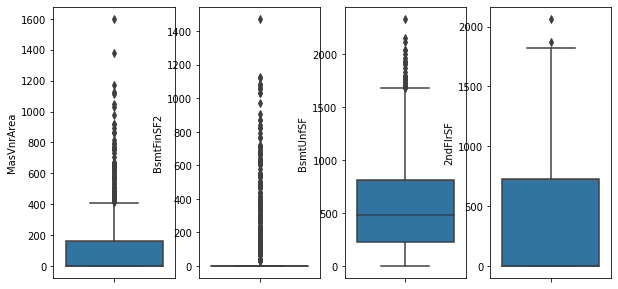

In [46]:
f, axes = plt.subplots(1, 4)
sns.boxplot(y = train_w['MasVnrArea'], ax = axes[0])
sns.boxplot(y = train_w['BsmtFinSF2'], ax = axes[1])
sns.boxplot(y = train_w['BsmtUnfSF'], ax = axes[2])
sns.boxplot(y = train_w['2ndFlrSF'], ax = axes[3])

LowQualFinSF - этот признак также есть не у всех, тут данные очень разрозненны и много выбросов

WoodDeckSF - не везде есть деревянная терасса, при этом у некоторых домов они огромные по размеру

PoolArea - аналогично и с бассейном

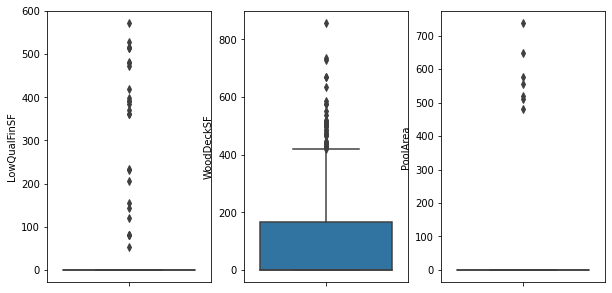

In [47]:
f, axes = plt.subplots(1, 3)
sns.boxplot(y = train_w['LowQualFinSF'], ax = axes[0])
sns.boxplot(y = train_w['WoodDeckSF'], ax = axes[1])
sns.boxplot(y = train_w['PoolArea'], ax = axes[2])

OpenPorchSF - открытая веранда есть не у всех домов

EnclosedPorch - у большинства домов нет закрытой веранды

3SsnPorch - тоже самое с крыльцом

ScreenPorch - аналогично

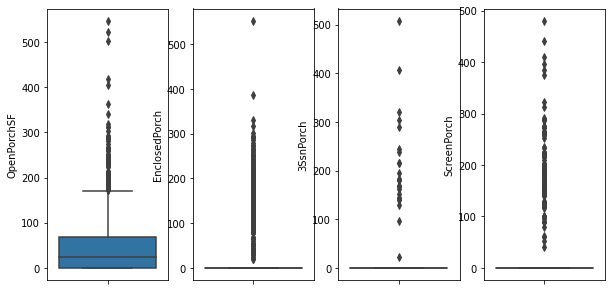

In [48]:
f, axes = plt.subplots(1, 4)
sns.boxplot(y = train_w['OpenPorchSF'], ax = axes[0])
sns.boxplot(y = train_w['EnclosedPorch'], ax = axes[1])
sns.boxplot(y = train_w['3SsnPorch'], ax = axes[2])
sns.boxplot(y = train_w['ScreenPorch'], ax = axes[3])

BsmtFullBath - выбросы минимальные

BsmtHalfBath - почти все значения равны 0

FullBath - выбросов нет

HalfBath - выбросов нет

Fireplaces - выбросы минимальные

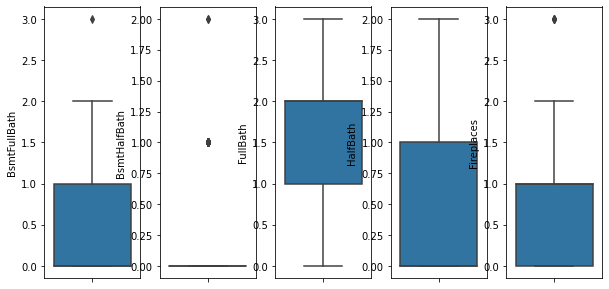

In [49]:
f, axes = plt.subplots(1, 5)
sns.boxplot(y = train_w['BsmtFullBath'], ax = axes[0])
sns.boxplot(y = train_w['BsmtHalfBath'], ax = axes[1])
sns.boxplot(y = train_w['FullBath'], ax = axes[2])
sns.boxplot(y = train_w['HalfBath'], ax = axes[3])
sns.boxplot(y = train_w['Fireplaces'], ax = axes[4])

LotArea - у площади большой разброс, много выбросов

MiscVal - у домов в основном нет доп. фишек

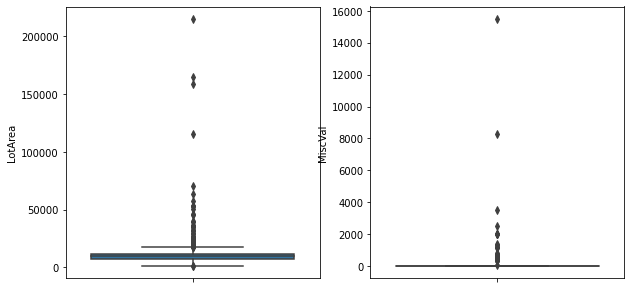

In [50]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y = train_w['LotArea'], ax = axes[0])
sns.boxplot(y = train_w['MiscVal'], ax = axes[1])

Рассмотрим графики target value:

Большинство домов стоят почти 100 000 - 200 000. При этом, дорогих домов больше, чем дешевых

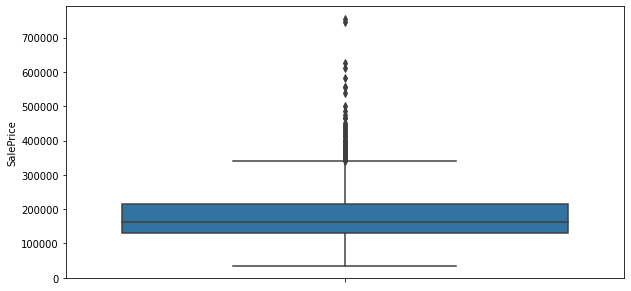

In [51]:
sns.boxplot(y = train_w['SalePrice'])

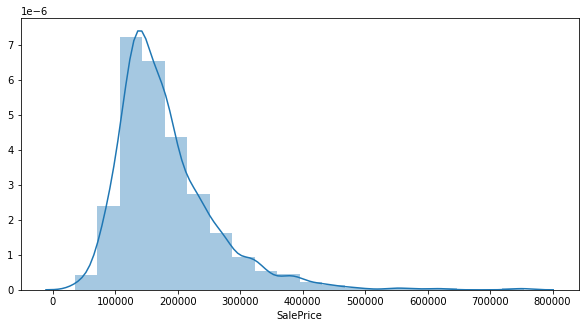

In [52]:
sns.distplot(train_w['SalePrice'], 20)

### Рассмотрим тестовый датасет

In [53]:
test.shape

(1459, 80)

Удаление дубликатов:

In [54]:
test = test.drop_duplicates()

Дубликатов не было:

In [55]:
test.shape

(1459, 80)

Набор данных аналогичен, за исключением последнего столбца с ценой. Есть пропуски:

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### Заполнение пропущенных значений

In [57]:
test_w = test.copy()

Пропущенные значения заполняем по такой же логике, как и в тренировочном датасете

Параметр Alley.

Скорее всего, незаполненные значение это "No alley access"

In [58]:
test_w['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [59]:
test_w['Alley'] = test_w['Alley'].fillna('NA')

Параметр MSZoning.

Категориальный параметр, заполним модой.

In [60]:
test_w['MSZoning'].mode()

0    RL
dtype: object

In [61]:
test_w['MSZoning'] = test_w['MSZoning'].fillna('RL')

Парамет Utilities.

Категориальный параметр, заполним модой.

In [62]:
test_w['Utilities'].mode()

0    AllPub
dtype: object

In [63]:
test_w['Utilities'] = test_w['Utilities'].fillna('AllPub')

Параметры Exterior1st, Exterior2nd.

Категориальные параметры, заполним модой.

In [64]:
test_w['Exterior1st'].mode() , test_w['Exterior2nd'].mode()

(0    VinylSd
 dtype: object, 0    VinylSd
 dtype: object)

In [65]:
test_w['Exterior1st'] = test_w['Exterior1st'].fillna('VinylSd')
test_w['Exterior2nd'] = test_w['Exterior2nd'].fillna('VinylSd')

Параметры MasVnrType, MasVnrArea.

Для строки 1150 параметр MasVnrType заполним самым популярным значением, отличным от None (т.к. площадь все-такие есть),
остальные заполним значением None, a MasVnrArea заполним 0.

In [66]:
test_w[test_w['MasVnrType'].isnull()].iloc[:, 25:27]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [67]:
test_w['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [68]:
test_w.iloc[1150, 25] = 'BrkFace'
test_w['MasVnrType'] = test_w['MasVnrType'].fillna('None')
test_w['MasVnrArea'] = test_w['MasVnrArea'].fillna(0)

Параметры BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtS.

Для строк 580, 725 и 1064 параметр BsmtCond заполним модой.

Отсутствующие BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtS заполним 0, а BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 заполним значением "No basement", если остальные столбцы незаполнены.

In [69]:
test_w[test_w['BsmtCond'].isnull()].iloc[:,30:39]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
125,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
133,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
269,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
318,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
354,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
387,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
388,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
396,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
397,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
398,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [70]:
test_w['BsmtCond'].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [71]:
test_w.iloc[580, 31] = 'TA'
test_w.iloc[725, 31] = 'TA'
test_w.iloc[1064, 31] = 'TA'
test_w['BsmtFinSF1'] = test_w['BsmtFinSF1'].fillna(0)
test_w['BsmtFinSF2'] = test_w['BsmtFinSF2'].fillna(0)
test_w['BsmtUnfSF'] = test_w['BsmtUnfSF'].fillna(0)
test_w['TotalBsmtSF'] = test_w['TotalBsmtSF'].fillna(0)
test_w['BsmtQual'] = test_w['BsmtQual'].fillna('NA')
test_w['BsmtCond'] = test_w['BsmtCond'].fillna('NA')
test_w['BsmtExposure'] = test_w['BsmtExposure'].fillna('NA')
test_w['BsmtFinType1'] = test_w['BsmtFinType1'].fillna('NA')
test_w['BsmtFinType2'] = test_w['BsmtFinType2'].fillna('NA')

Параметры BsmtFullBath, BsmtHalfBath.

Так как параметр целочисленыый, то заполним модой:

In [72]:
test_w[test_w['BsmtFullBath'].isnull()].iloc[:,47:49]

,BsmtFullBath,BsmtHalfBath
660,NaN,NaN
728,NaN,NaN


In [73]:
test_w['BsmtFullBath'].mode(), test_w['BsmtHalfBath'].mode()

(0    0.0
 dtype: float64, 0    0.0
 dtype: float64)

In [74]:
test_w['BsmtFullBath'] = test_w['BsmtFullBath'].fillna(0)
test_w['BsmtHalfBath'] = test_w['BsmtHalfBath'].fillna(0)

Параметр KitchenQual.

Категориальный параметр, заполним модой.

In [75]:
test_w['KitchenQual'].mode()

0    TA
dtype: object

In [76]:
test_w['KitchenQual'] = test_w['KitchenQual'].fillna('TA')

Параметр Functional.

Категориальный параметр, заполним модой.

In [77]:
test_w['Functional'].mode()

0    Typ
dtype: object

In [78]:
test_w['Functional'] = test_w['Functional'].fillna('Typ')

Параметр FireplaceQu.

Сумма каминов Fireplaces у строк с пропущенным FireplaceQu равно 0. Заполним "No fireplace"

In [79]:
test_w['Fireplaces'].value_counts()

0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64

In [80]:
test_w[test_w['FireplaceQu'].isnull()]['Fireplaces'].sum()

0

In [81]:
test_w['FireplaceQu'] = test_w['FireplaceQu'].fillna('NA')

Парамеры GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond.

Для строк 1116 и 666 год заполним таким же, как год постройки дома, площадь гаража - средним, остальные параметры - модой

In [82]:
test_w[test_w['GarageCars'].isnull()].iloc[:, 58:65]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
test_w['GarageFinish'].mode(), test_w['GarageCars'].mode(), test_w['GarageArea'].mean(), test_w['GarageQual'].mode(), test_w['GarageCond'].mode()

(0    Unf
 dtype: object, 0    2.0
 dtype: float64, 472.76886145404666, 0    TA
 dtype: object, 0    TA
 dtype: object)

In [84]:
test_w[test_w['GarageYrBlt'].isnull()].iloc[:, 58:65]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
71,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
92,NaN,NaN,NaN,0.0,0.0,NaN,NaN
96,NaN,NaN,NaN,0.0,0.0,NaN,NaN
98,NaN,NaN,NaN,0.0,0.0,NaN,NaN
100,NaN,NaN,NaN,0.0,0.0,NaN,NaN
130,NaN,NaN,NaN,0.0,0.0,NaN,NaN
133,NaN,NaN,NaN,0.0,0.0,NaN,NaN
134,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [85]:
test_w.iloc[1116, 59] = int('1923')
test_w.iloc[1116, 60] = 'Unf'
test_w.iloc[1116, 61] = int('2')
test_w.iloc[1116, 62] = float('472.76')
test_w.iloc[1116, 63] = 'TA'
test_w.iloc[1116, 64] = 'TA'
test_w.iloc[666, 59] = int('1910')
test_w.iloc[666, 60] = 'Unf'
test_w.iloc[666, 63] = 'TA'
test_w.iloc[666, 64] = 'TA'
test_w['GarageType'] = test_w['GarageType'].fillna('NA')
test_w['GarageFinish'] = test_w['GarageFinish'].fillna('NA')
test_w['GarageQual'] = test_w['GarageQual'].fillna('NA')
test_w['GarageCond'] = test_w['GarageCond'].fillna('NA')
test_w['GarageYrBlt'] = test_w['GarageYrBlt'].fillna(0)

Параметр PoolQC.

Заполним пропуски, где есть площадь модой, остальные значением "No pool"

In [86]:
 test_w[test_w['PoolArea'] != 0].iloc[:,71:73]

,PoolArea,PoolQC
514,144,Ex
960,368,NaN
1043,444,NaN
1113,228,Ex
1139,561,NaN
1250,800,Gd


In [87]:
test_w.iloc[960, 72] = 'Ex'
test_w.iloc[1043, 72] = 'Ex'
test_w.iloc[1139, 72] = 'Ex'
test_w['PoolQC'] = test_w['PoolQC'].fillna('NA')

Параметр Fence.

в текущем варианте нет участков без забора, предположим, что отсутсвующие значение это и есть участи без забора и заполним значением "No Fence":

In [88]:
test_w['Fence'].value_counts()

MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64

In [89]:
test_w['Fence'] = test_w['Fence'].fillna('NA')

Параметр MiscFeature.

Аналагично предыдущему параметру:

In [90]:
test_w['MiscFeature'].value_counts()

Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64

In [91]:
test_w['MiscFeature'] = test_w['MiscFeature'].fillna('NA')

Параметр SaleType.

Категориальный параметр, заполним модой:

In [92]:
test_w['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [93]:
test_w['SaleType'] = test_w['SaleType'].fillna('WD')

Параметр LotFrontage.

Числовой параматр, заполним средним:

In [94]:
test_w['LotFrontage'] = test_w['LotFrontage'].fillna(test_w['LotFrontage'].mean())

In [95]:
test_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

### Приведение данных к нужному формату

Проверим, в верном ли формате хранятся данные:

In [96]:
for i in range(len(test_w['LotFrontage'].unique())):
    if test_w['LotFrontage'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_true


In [97]:
for i in range(len(test_w['MasVnrArea'].unique())):
    if test_w['MasVnrArea'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [98]:
for i in range(len(test_w['BsmtFinSF1'].unique())):
    if test_w['BsmtFinSF1'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [99]:
for i in range(len(test_w['BsmtFinSF2'].unique())):
    if test_w['BsmtFinSF2'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [100]:
for i in range(len(test_w['TotalBsmtSF'].unique())):
    if test_w['TotalBsmtSF'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [101]:
for i in range(len(test_w['BsmtFullBath'].unique())):
    if test_w['BsmtFullBath'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [102]:
for i in range(len(test_w['BsmtHalfBath'].unique())):
    if test_w['BsmtHalfBath'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [103]:
for i in range(len(test_w['GarageYrBlt'].unique())):
    if test_w['GarageYrBlt'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [104]:
for i in range(len(test_w['GarageCars'].unique())):
    if test_w['GarageCars'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [105]:
for i in range(len(test_w['GarageArea'].unique())):
    if test_w['GarageArea'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_true


In [106]:
for i in range(len(test_w['BsmtUnfSF'].unique())):
    if test_w['BsmtUnfSF'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


Верный тип только у LotFrontage и GarageArea. Приведем остальные к нужному:

In [107]:
test_w['MasVnrArea'] = test_w.MasVnrArea.astype('int64')
test_w['BsmtFinSF1'] = test_w.BsmtFinSF1.astype('int64')
test_w['BsmtFinSF2'] = test_w.BsmtFinSF2.astype('int64')
test_w['TotalBsmtSF'] = test_w.TotalBsmtSF.astype('int64')
test_w['BsmtFullBath'] = test_w.BsmtFullBath.astype('int64')
test_w['BsmtHalfBath'] = test_w.BsmtHalfBath.astype('int64')
test_w['GarageYrBlt'] = test_w.GarageYrBlt.astype('int64')
test_w['GarageCars'] = test_w.GarageCars.astype('int64')
test_w['BsmtUnfSF'] = test_w.BsmtUnfSF.astype('int64')

## One Hot Encoding

Преобразуем категориальные признаки в числовые значения

Текстовые столбцы:

In [108]:
for i in range(len(train_w.columns)):
    if type(train_w.iloc[1, i]) == str:
        print(train_w.columns[i])

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


Применяем метод get_dummies для 43 столбцов и получаем 305:

In [109]:
train_dumm = pd.get_dummies(train_w, columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', \
                                               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', \
                                               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
                                               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', \
                                               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
                                               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', \
                                               'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', \
                                               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', \
                                               'SaleType', 'SaleCondition'])

test_dumm = pd.get_dummies(test_w, columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', \
                                               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', \
                                               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
                                               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', \
                                               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
                                               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', \
                                               'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', \
                                               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', \
                                               'SaleType', 'SaleCondition'])
len(train_dumm.columns)

305

## Зависимость параметров

Мы получили огромное количество столбцов, возможно, некоторые переменные можно исключить так как они не несут никакой
информации (сильно коррелированы между собой). Поскольку параметров слишком много, то посмотрим корреляцию параметров, которые
относятся к одному признаку (например, гараж или подвал).

Перечень всех параметров:

In [110]:
list(train_dumm)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_NA',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_In

Для начала рассмотрим параметры, относящиеся к гаражам. Сильных корреляций нет (за исключением некоторых параметров, которые мы заполняли отсутствующим значением):

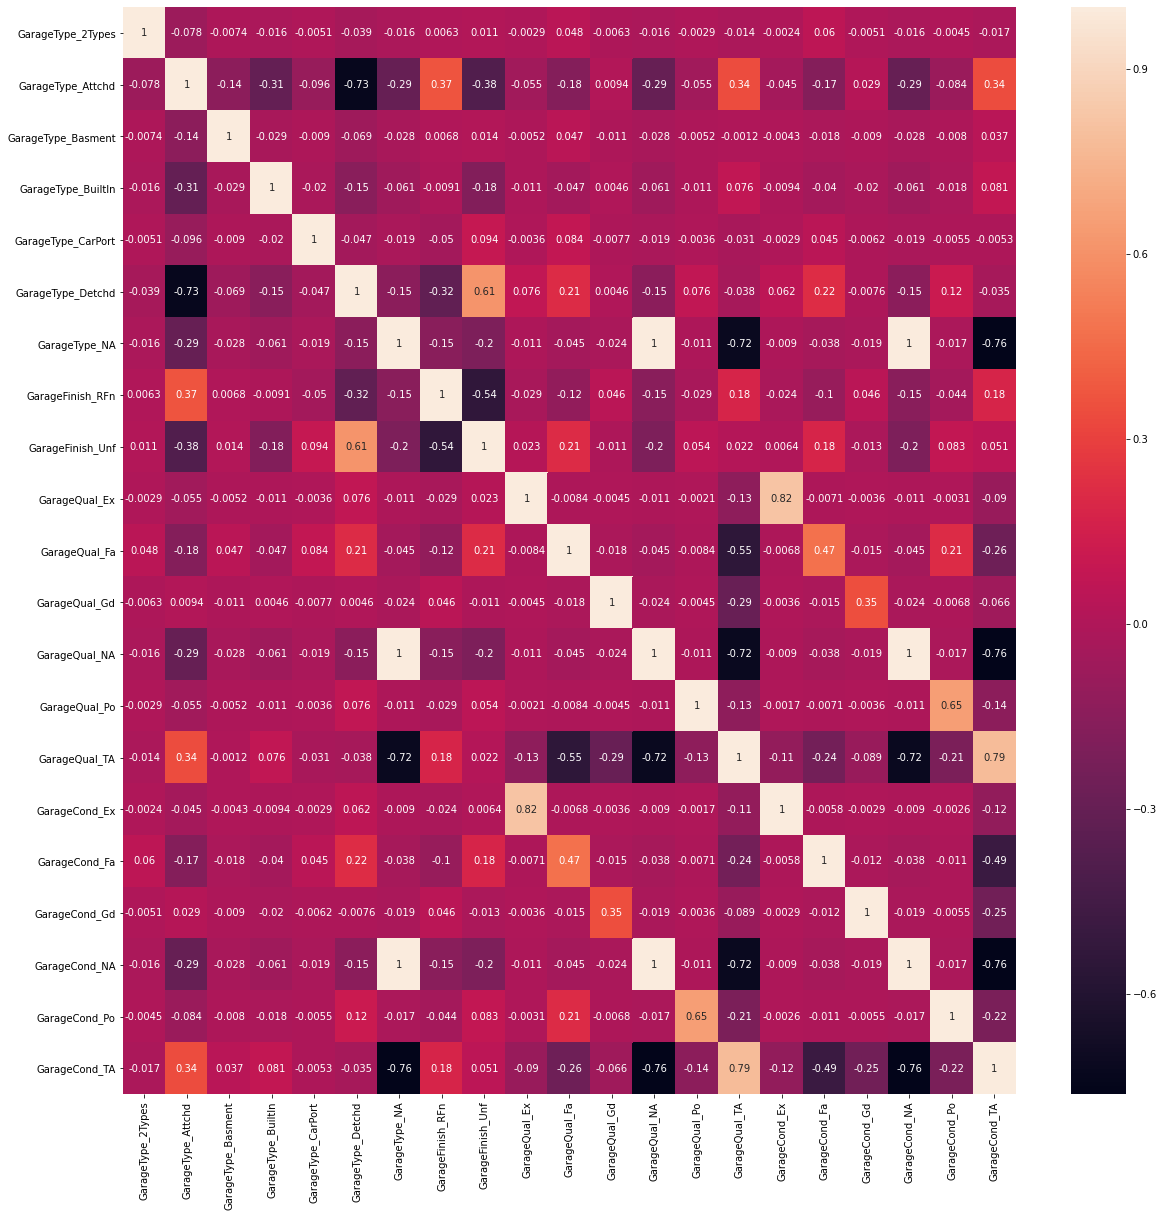

In [111]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap((train_dumm[['GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', \
           'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Ex', 'GarageQual_Fa', \
           'GarageQual_Gd', 'GarageQual_NA','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_Fa', 'GarageCond_Gd',\
            'GarageCond_NA','GarageCond_Po','GarageCond_TA']]).corr(), annot = True)

Расположение дома, сильной корреляции нет:

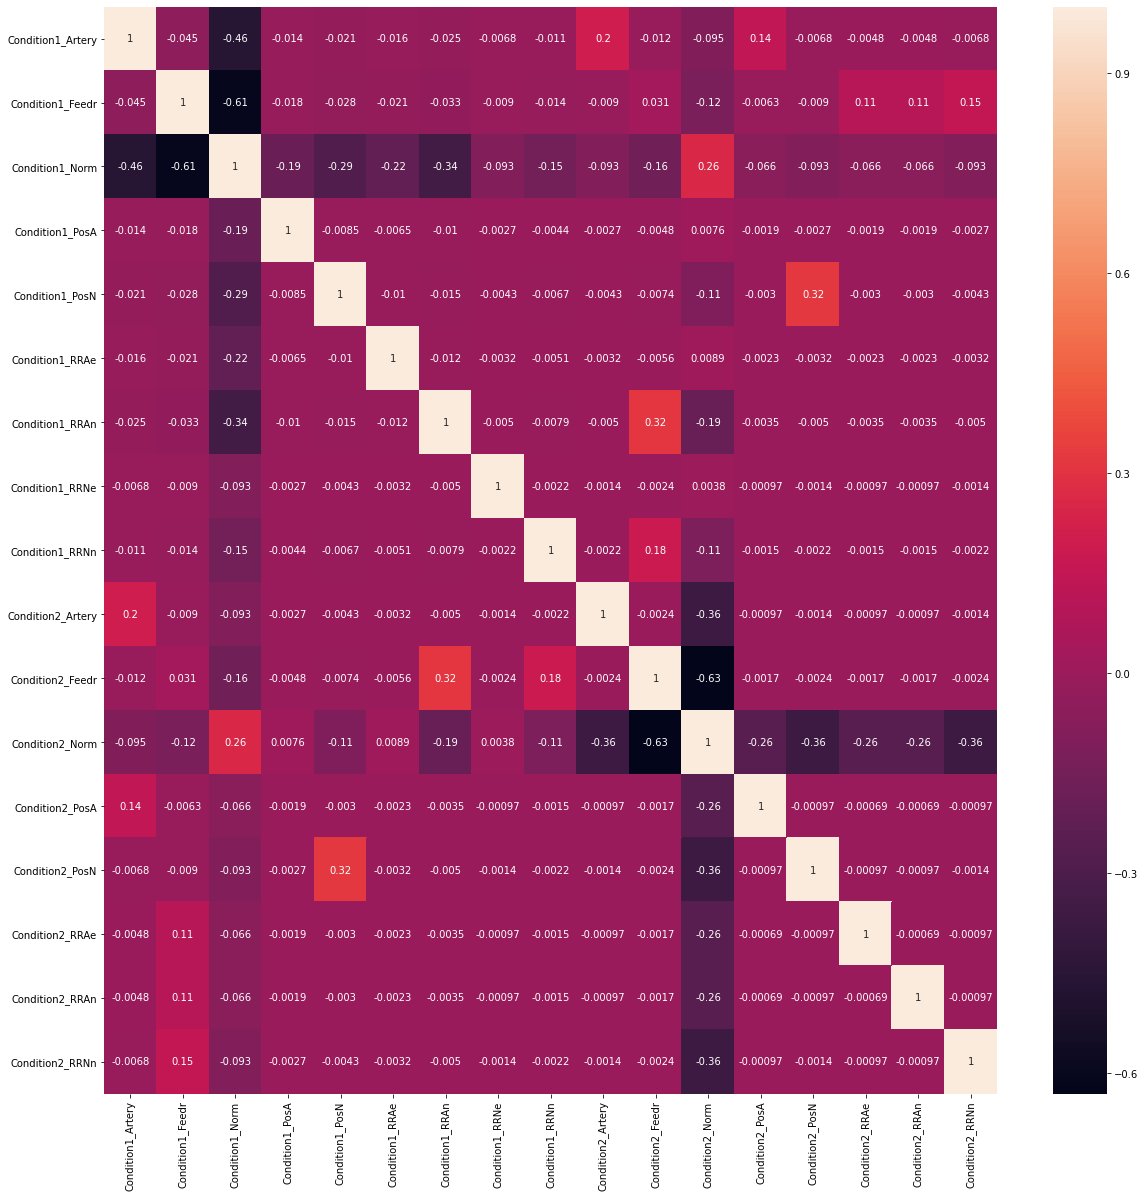

In [112]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap((train_dumm[['Condition1_Artery','Condition1_Feedr','Condition1_Norm','Condition1_PosA','Condition1_PosN', \
 'Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn','Condition2_Artery','Condition2_Feedr', \
'Condition2_Norm','Condition2_PosA','Condition2_PosN','Condition2_RRAe','Condition2_RRAn', \
'Condition2_RRNn']]).corr(), annot = True)

Состояние дома. Корреляции нет:

In [113]:
train_dumm[['OverallQual', 'OverallCond']].corr()

,OverallQual,OverallCond
OverallQual,1.000000,-0.091932
OverallCond,-0.091932,1.000000


Характеристики подвала. Сильных корреляций нет:

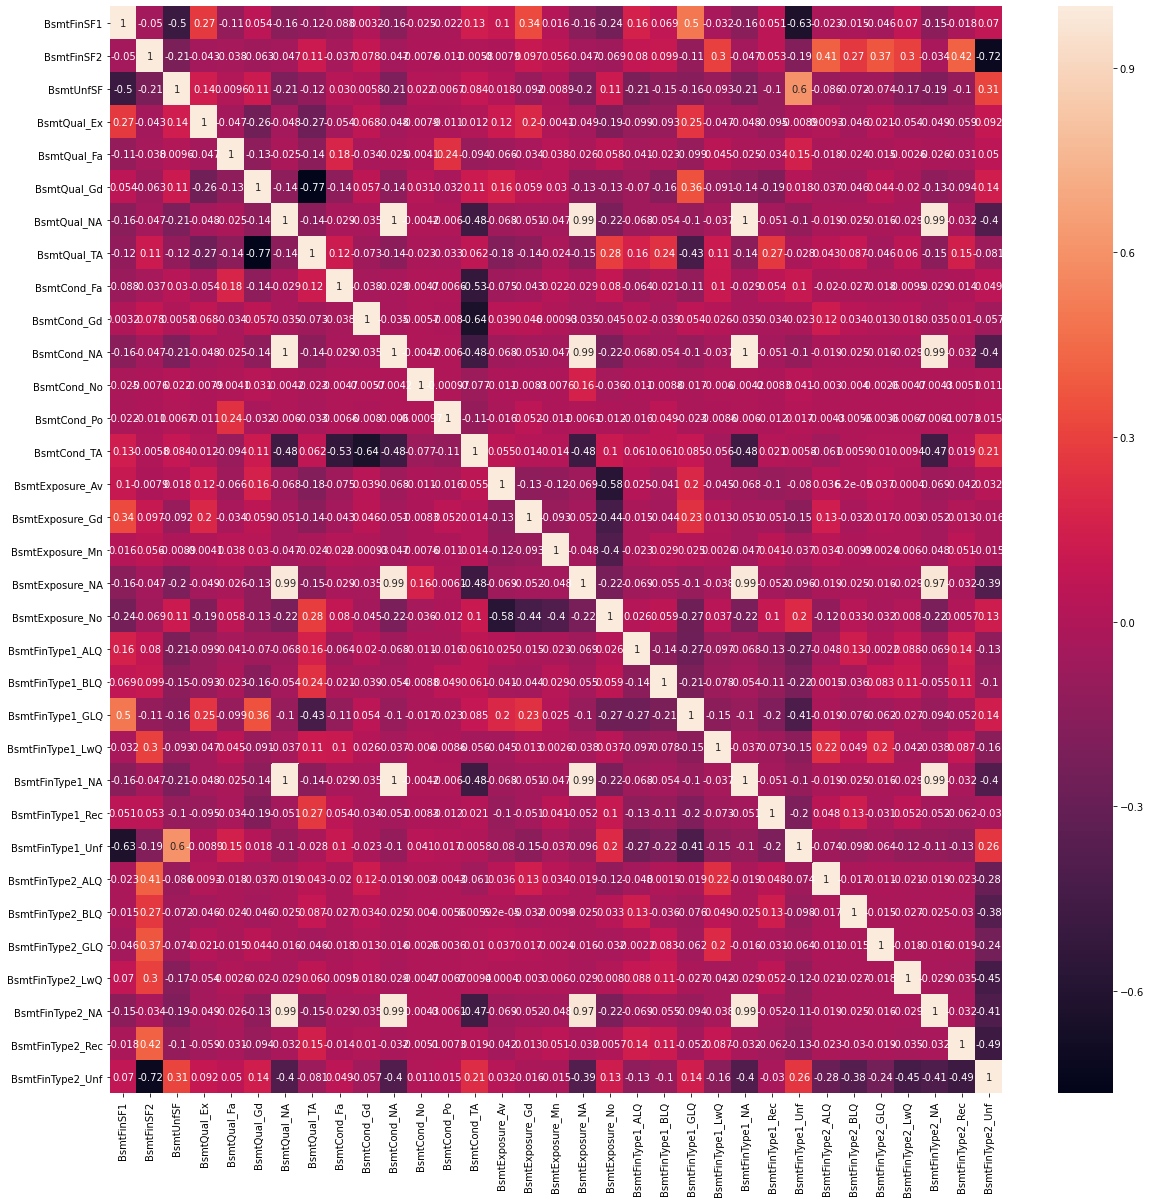

In [114]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap((train_dumm[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtQual_Ex','BsmtQual_Fa','BsmtQual_Gd','BsmtQual_NA', \
                         'BsmtQual_TA','BsmtCond_Fa','BsmtCond_Gd','BsmtCond_NA','BsmtCond_No','BsmtCond_Po','BsmtCond_TA', \
                         'BsmtExposure_Av','BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_NA','BsmtExposure_No', \
                         'BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_NA', \
                         'BsmtFinType1_Rec','BsmtFinType1_Unf','BsmtFinType2_ALQ','BsmtFinType2_BLQ','BsmtFinType2_GLQ', \
                         'BsmtFinType2_LwQ','BsmtFinType2_NA','BsmtFinType2_Rec','BsmtFinType2_Unf']]).corr(), annot = True)

Камины. Сильная корреляция у количества каминов с качеством "нет камина". Видимо, количество 0 сильно коррелирует с качеством "нет камина".

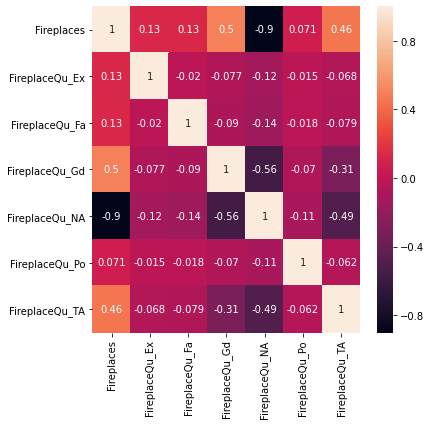

In [115]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap((train_dumm[['Fireplaces', 'FireplaceQu_Ex','FireplaceQu_Fa','FireplaceQu_Gd','FireplaceQu_NA','FireplaceQu_Po', \
                         'FireplaceQu_TA']]).corr(), annot = True)

Бассейн. Аналогичная каминам ситуация:

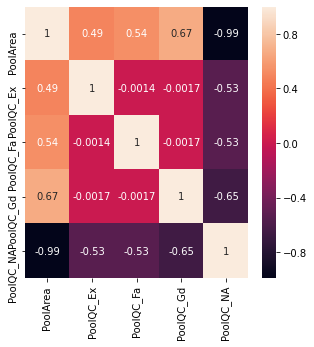

In [116]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap((train_dumm[['PoolArea','PoolQC_Ex','PoolQC_Fa','PoolQC_Gd','PoolQC_NA']]).corr(), annot = True)

Нет ярко выраженных признаков, которые можно исключить из обучающей модели после построения матриц корреляции.

Можно попробовать специальные методы feature selection.

### Разделение датасета на тренировочный и тестовый

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
train_dumm_y = train_dumm['SalePrice']

In [175]:
train_dumm_x = train_dumm.drop(['SalePrice', 'Id'], axis = 1)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(train_dumm_x, train_dumm_y, test_size = 0.3)

### Feature Selection

Метод RFE:

In [177]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()

In [178]:
#import warnings
#warnings.filterwarnings('ignore', category = FutureWarning)
#warnings.filterwarnings('ignore', category = ConvergenceWarning)

In [179]:
#rfe = RFE(model, 25)
#rfe = rfe.fit(x_train, y_train)

In [180]:
#print(rfe.support_)
#print(rfe.ranking_)

Посмотрим важность атрибутов с помощью Extra Tree Classifier:

In [181]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [182]:
model = ExtraTreesClassifier(n_estimators=100)

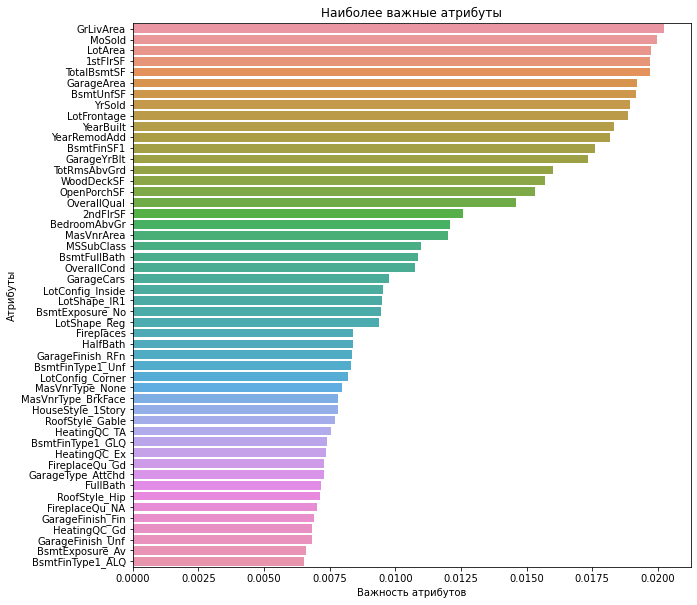

In [183]:
model.fit(x_train, y_train)
headers = list(x_train.columns.values)
feature_imp = pd.Series(model.feature_importances_, index = headers).sort_values(ascending=False).head(50)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

А теперь посмотрим важность атрибутов с помощью Random Forest Classifier:

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
model = RandomForestClassifier(n_estimators=100)

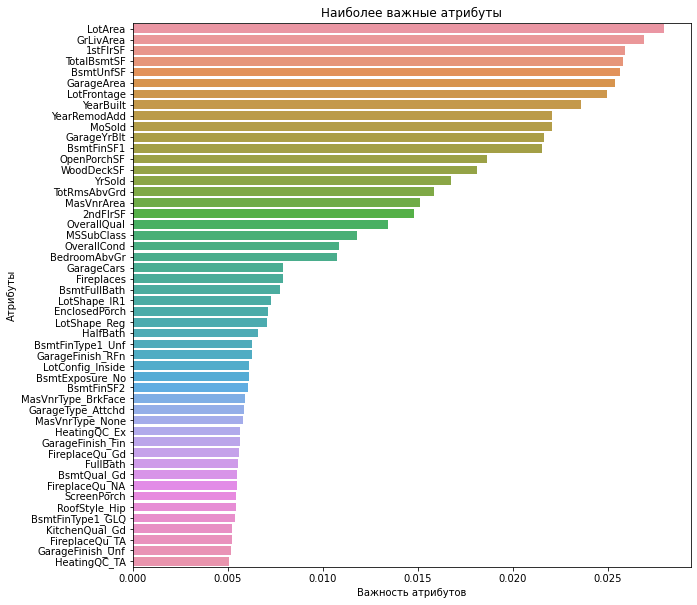

In [186]:
model.fit(x_train, y_train)
headers = list(x_train.columns.values)
feature_imp = pd.Series(model.feature_importances_, index = headers).sort_values(ascending=False).head(50)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

Для начала, попробуем построить модели не выкидывая никакие признаки и оценим качество

## Нормализация данных

In [187]:
from sklearn import preprocessing

In [188]:
x_train_std = preprocessing.scale(x_train)
x_test_std = preprocessing.scale(x_test)
y_train_std = preprocessing.scale(y_train)
y_test_std = preprocessing.scale(y_test)

### Построение моделей

#### 1. Linear Regression

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [190]:
LR = LinearRegression()

In [191]:
LR.fit(x_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Визуализация:

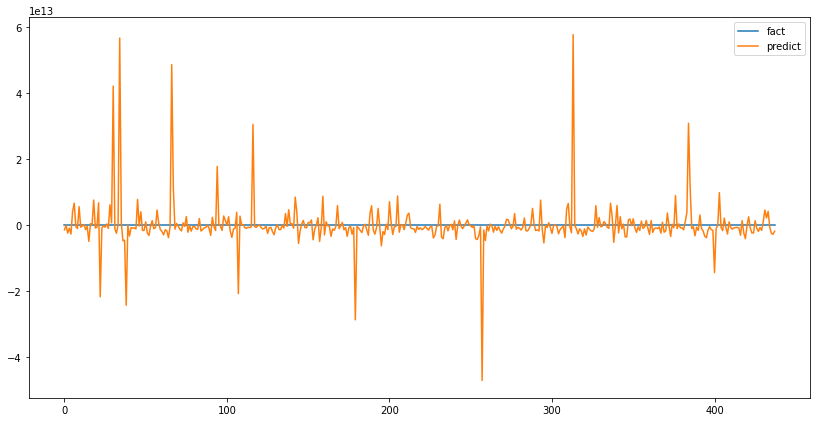

In [192]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(LR.predict(x_test_std), label = 'predict')
plt.legend()

Оценка качества:

In [193]:
# в идеале должно быть 0
mean_squared_error(y_test_std, LR.predict(x_test_std))

4.661845726475499e+25

In [194]:
# в идеале должно быть 1
r2_score(y_test_std, LR.predict(x_test_std))

-4.6618457264754995e+25

In [195]:
# в идеале должно быть 0
mean_absolute_error(y_test_std, LR.predict(x_test_std))

2760517446506.556

#### 2. Decision Tree Regressor

In [196]:
from sklearn.tree import DecisionTreeRegressor

In [197]:
DTR = DecisionTreeRegressor()

In [198]:
DTR.fit(x_train_std, y_train_std)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Визуализация:

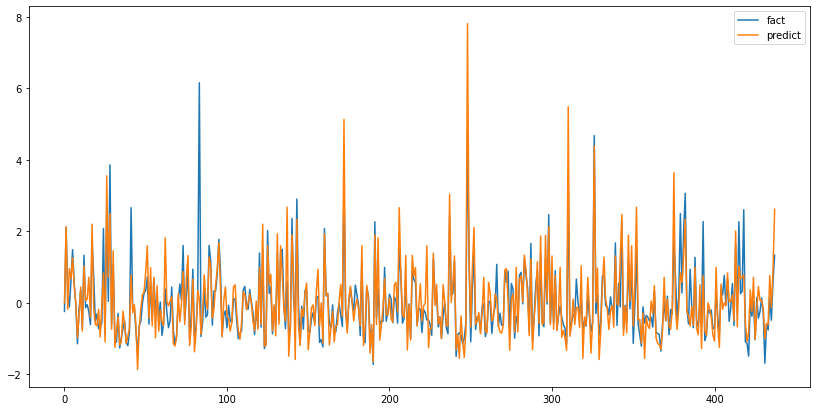

In [199]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(DTR.predict(x_test_std), label = 'predict')
plt.legend()

Оценка качетсва:

In [200]:
# в идеале должно быть 0
mean_squared_error(y_test_std, DTR.predict(x_test_std))

0.36415555553532697

In [201]:
# в идеале должно быть 1
r2_score(y_test_std, DTR.predict(x_test_std))

0.6358444444646729

In [202]:
# в идеале должно быть 0
mean_absolute_error(y_test_std, DTR.predict(x_test_std))

0.3749294691212198

#### 3. Random Forest Regressor

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [232]:
RFRn10 = RandomForestRegressor(n_estimators = 10)
RFRn50 = RandomForestRegressor(n_estimators = 50)
RFRn100 = RandomForestRegressor(n_estimators = 100)

In [233]:
RFRn10.fit(x_train_std, y_train_std)
RFRn50.fit(x_train_std, y_train_std)
RFRn100.fit(x_train_std, y_train_std)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Визуализация:

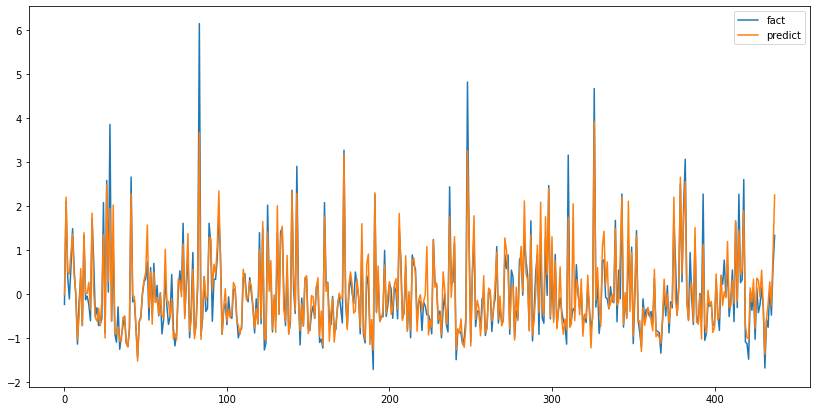

In [206]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(RFRn10.predict(x_test_std), label = 'predict')
plt.legend()

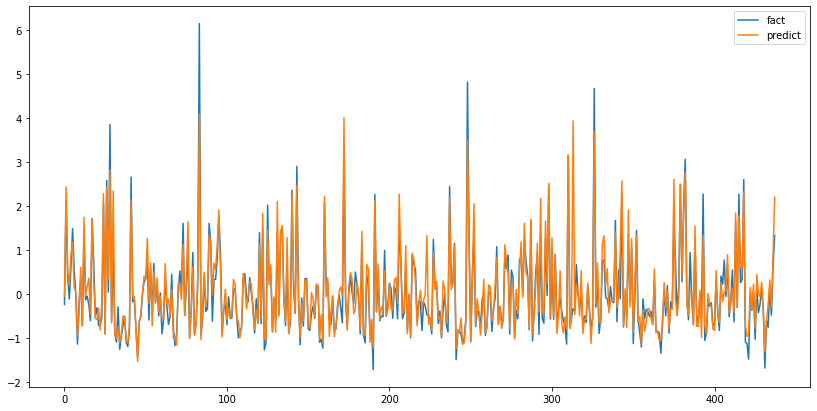

In [207]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(RFRn50.predict(x_test_std), label = 'predict')
plt.legend()

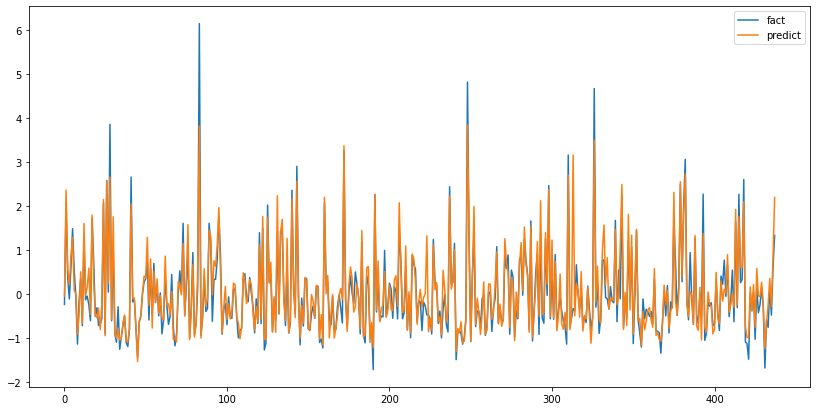

In [208]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(RFRn100.predict(x_test_std), label = 'predict')
plt.legend()

Оценка качетсва:

In [237]:
# в идеале должно быть 0
print(mean_squared_error(y_test_std, RFRn10.predict(x_test_std)))
print(mean_squared_error(y_test_std, RFRn50.predict(x_test_std)))
print(mean_squared_error(y_test_std, RFRn100.predict(x_test_std)))

0.11924981434774433
0.14245840164141935
0.15462087739773483


In [210]:
# в идеале должно быть 1
print(r2_score(y_test_std, RFRn10.predict(x_test_std)))
print(r2_score(y_test_std, RFRn50.predict(x_test_std)))
print(r2_score(y_test_std, RFRn100.predict(x_test_std)))

0.8563191814402201
0.8517438981132351
0.866632552288766


In [211]:
# в идеале должно быть 0
print(mean_absolute_error(y_test_std, RFRn10.predict(x_test_std)))
print(mean_absolute_error(y_test_std, RFRn50.predict(x_test_std)))
print(mean_absolute_error(y_test_std, RFRn100.predict(x_test_std)))

0.24740167673580862
0.23258653707348126
0.22623361428884398


#### 4. SVR

In [212]:
from sklearn.svm import SVR

In [213]:
SVR = SVR()

In [214]:
SVR.fit(x_train_std, y_train_std)

C:\Users\Dmitry\Anaconda3\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Визуализация:

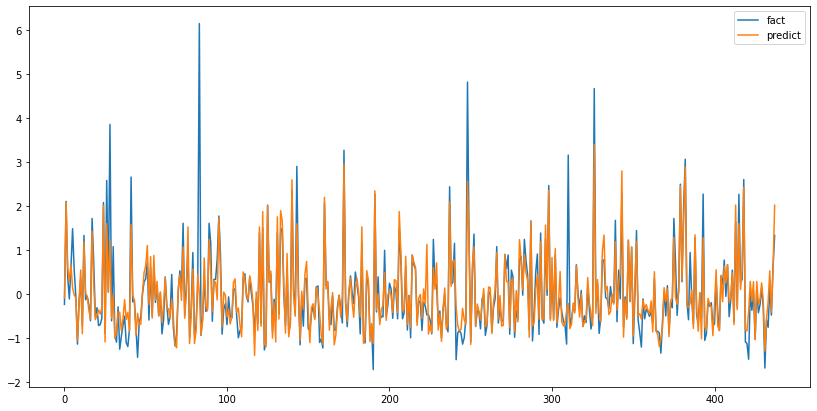

In [215]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(SVR.predict(x_test_std), label = 'predict')
plt.legend()

Оценка качества:

In [216]:
# в идеале должно быть 0
print(mean_squared_error(y_test_std, RFRn10.predict(x_test_std)))

0.14368081855977988


In [217]:
# в идеале должно быть 1
print(r2_score(y_test_std, RFRn10.predict(x_test_std)))

0.8563191814402201


In [218]:
# в идеале должно быть 0
print(mean_absolute_error(y_test_std, RFRn10.predict(x_test_std)))

0.24740167673580862


#### 5. Light GBM

In [219]:
#pip install lightgbm

In [220]:
import lightgbm

In [221]:
lgbm_train = lightgbm.Dataset(x_train_std, label = y_train_std)

In [222]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['sub_feature'] = 0.4
params['min_data'] = 50
params['max_depth'] = 10

In [223]:
LGBM = lightgbm.train(params, lgbm_train, 1000)

Визуализация:

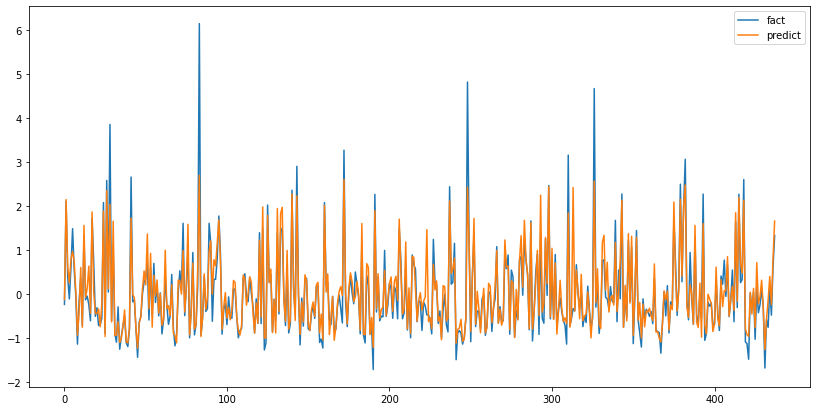

In [224]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(LGBM.predict(x_test_std), label = 'predict')
plt.legend()

Оценка качества:

In [225]:
# в идеале должно быть 0
print(mean_squared_error(y_test_std, LGBM.predict(x_test_std)))

0.15832933012341918


In [226]:
# в идеале должно быть 1
print(r2_score(y_test_std, LGBM.predict(x_test_std)))

0.8416706698765808


In [227]:
# в идеале должно быть 0
print(mean_absolute_error(y_test_std, LGBM.predict(x_test_std)))

0.22897639480320034


### Оценка итогов работы алгоритмов

По заданию, успешность алгоритма оценивается метрикой mean squared error. При разных train-test выборках лучшие показатели показывают либо Light GBM, либо Random Forest Regressor (как с n=10, так и с n=100)

In [238]:
print(f'Linear Regression: {mean_squared_error(y_test_std, LR.predict(x_test_std))}')
print(f'Decision Tree Regressor: {mean_squared_error(y_test_std, DTR.predict(x_test_std))}')
print(f'Random Forest Regressor n=10: {mean_squared_error(y_test_std, RFRn10.predict(x_test_std))}')
print(f'Random Forest Regressor n=50: {mean_squared_error(y_test_std, RFRn50.predict(x_test_std))}')
print(f'Random Forest Regressor n=100: {mean_squared_error(y_test_std, RFRn100.predict(x_test_std))}')
print(f'SVR: {mean_squared_error(y_test_std, SVR.predict(x_test_std))}')
print(f'Light GBM: {mean_squared_error(y_test_std, LGBM.predict(x_test_std))}')

Linear Regression: 4.661845726475499e+25
Decision Tree Regressor: 0.36415555553532697
Random Forest Regressor n=10: 0.11924981434774433
Random Forest Regressor n=50: 0.14245840164141935
Random Forest Regressor n=100: 0.15462087739773483
SVR: 0.24461326748440088
Light GBM: 0.15832933012341918
